# <span style="color:darkcyan">Federated Learning with Differential Privacy for MNIST:<br>Comparing Two Approaches</span>


This Jupyter Notebook contains implementations of Federated Learning models for the MNIST dataset, showcasing two different approaches to compare their effectiveness in terms of classification performance and privacy mechanisms.

### *`Overview`*

Federated Learning allows for decentralized model training while maintaining data privacy. On the other hand, differential privacy is a technique used to protect individuals' privacy when their data is included in a dataset. It ensures that the output of data analysis or a query doesn't reveal whether any individual's data was included. This is achieved by adding controlled noise to the results, making it difficult to identify specific information about any individual while still allowing for accurate insights into the overall dataset. Essentially, differential privacy provides a mathematical guarantee that any single individual's data doesn't significantly affect the outcome, protecting their privacy even if an attacker has some background knowledge.
In this repository, we compare two distinct Federated Learning architectures and privacy mechanisms for MNIST digit classification.

### *`Contents`*

- *<span style="color:red">Approach A</span>* *(Simple Feedforward Network):*<br> Chosen for its simplicity, computational efficiency, and as a baseline model to test the basic Federated Learning setup.

  
- *<span style="color:blue">Approach B</span>* *(Convolutional Neural Network - CNN):*<br> Selected for its superior performance in image classification tasks, leveraging the spatial feature extraction capabilities of convolutional layers to improve the accuracy of the model on the MNIST dataset.

### *`Comparison`*

Both *<span style="color:red">Approach A</span>* and *<span style="color:blue">Approach B</span>* implement federated learning with differential privacy, using different frameworks and approaches.

The choice of architecture in each approach reflects different design goals and considerations for Federated Learning (FL) in terms of complexity, performance, and generalization to the MNIST digit classification task.

#### *<span style="color:red">Approach A:</span>* *Simple Feedforward Neural Network*

- **Architecture:**
  - **Layers:** `Flatten` -> `Dense` -> `Dense`
  - **Activation:** ReLU for the hidden layer, Softmax for the output

- **Rationale:**
  - **Simplicity and Efficiency:** A feedforward neural network is straightforward to implement and computationally less expensive compared to more complex models like CNNs. This makes it suitable for environments with limited computational resources, which is often a concern in Federated Learning scenarios where client devices may have varying levels of computational power.
  
  - **Baseline Performance:** The simple feedforward network serves as a baseline model to establish a basic performance level. Despite its simplicity, this architecture can achieve reasonably good accuracy on MNIST, which is a relatively simple dataset.
  
  - **Use Case:** This architecture is often chosen when the primary goal is to demonstrate the feasibility of Federated Learning or when the focus is on low-resource settings rather than maximizing accuracy.

#### *<span style="color:blue">Approach B:</span>* *Convolutional Neural Network (CNN)*

- **Architecture:**
  - **Layers:** `Conv2d` -> `Linear`
  - **Activation:** ReLU for the convolutional layer, Log-Softmax for the output

- **Rationale:**
  - **Higher Performance:** CNNs are specifically designed for tasks involving spatial hierarchies, such as image classification. The convolutional layers can capture local patterns (like edges, textures, etc.), which are crucial for accurately classifying images. As a result, CNNs generally outperform feedforward networks on image datasets like MNIST.
  
  - **Generalization:** CNNs tend to generalize better on image data due to their ability to learn and extract spatial features, making them more robust and less prone to overfitting compared to fully connected networks, especially on larger datasets.
  
  - **Log-Softmax Activation:** The use of Log-Softmax in the output layer is common in classification tasks, particularly when combined with the negative log-likelihood loss, which offers numerical stability and better handling of probabilities in classification tasks.
  
  - **Use Case:** This approach is selected when the goal is to maximize model accuracy and leverage the strengths of CNNs in image classification tasks. It is particularly useful in Federated Learning setups where the client devices have sufficient computational resources to handle the more complex computations involved in CNNs.

### *`Remark:`*
Contrary to the initial expectation based on architectural differences, the feedforward network in *<span style="color:red">Approach A</span>* outperforms the CNN in *<span style="color:blue">Approach B</span>* in this specific federated learning setup for MNIST classification. This highlights the importance of not just relying on model architecture but also carefully considering the overall setup, including hyperparameters, data distribution, and training dynamics in federated learning.

#### *`Differential Privacy`*

1. *<span style="color:red">Approach A</span>*
   - **Differential Privacy Implementation:** Custom implementation adding noise to model weights.
   - **Noise Addition:** Manual, using `np.random.normal` to add noise to weights.

2. *<span style="color:blue">Approach B</span>*
   - **Differential Privacy Implementation:** Utilizes `Opacus` PrivacyEngine to handle differential privacy.
   - **Noise Addition:** Automated through `PrivacyEngine` during training.

#### *`Data Loading and Preprocessing`*

1. *<span style="color:red">Approach A</span>*
   - **Data Source:** MNIST from Keras.
   - **Preprocessing:** Normalization to [0, 1] range, one-hot encoding of labels.
   - **Client Data Splitting:** Manual splitting using `np.array_split`.

2. *<span style="color:blue">Approach B</span>*
   - **Data Source:** MNIST from `torchvision`.
   - **Preprocessing:** Normalization to [0, 1] range, one-hot encoding of labels.
   - **Client Data Splitting:** Manual splitting using `np.array_split`, converted to `DataLoader` for PyTorch.

#### *`Training Process`*

1. *<span style="color:red">Approach A</span>*
   - **Training Method:** Each client trains a local model, and weights are updated in the global model.
   - **Noise Addition:** Noise is added to weights after local training.
   - **Aggregation:** Weights are averaged for each layer.

2. *<span style="color:blue">Approach B</span>*
   - **Training Method:** Each client trains a local model using PyTorch, and local models are aggregated.
   - **Privacy and Aggregation:** Local models use differential privacy provided by `Opacus`.
   - **Aggregation:** Weights are averaged for each parameter.

#### *`Results`*

1. *<span style="color:red">Approach A</span>*
   - **Final Loss:** 0.10016341507434845
   - **Final Accuracy:** 0.9782000184059143
   - **Estimated Privacy Budget (ε):** 3.3833789404644246

2. *<span style="color:blue">Approach B</span>*
   - **Final Loss:** 0.2199314683675766
   - **Final Accuracy:** 0.9725000262260437
   - **Estimated Privacy Budget (ε):** 0.0004166666666666668

#### *`Key Differences`*

- **Framework:** *<span style="color:red">Approach A</span>* uses TensorFlow/Keras, while *<span style="color:blue">Approach B</span>* uses PyTorch with `Opacus`.
- **Privacy Implementation:** *<span style="color:red">Approach A</span>* manually adds noise to weights, whereas *<span style="color:blue">Approach B</span>* uses `Opacus` to handle differential privacy.
- **Model Type:** *<span style="color:red">Approach A</span>* uses a simple feedforward network, while *<span style="color:blue">Approach B</span>* uses a CNN, which is generally more effective for image classification tasks.

### *`Conclusion Based on Performance and Accuracy`*

1. *<span style="color:red">Approach A:</span>*
   - Shows good performance with accuracy and loss values improving steadily over rounds.
   - The final metrics are satisfactory, with high accuracy and acceptable privacy estimates.

2. *<span style="color:blue">Approach B:</span>*
   - The final results show that the model achieves competitive accuracy, but with some fluctuation in performance due to differential privacy constraints.
   - The noise multiplier and privacy guarantees are more rigorously managed.





## ***<span style="color:red">Approach A:</span>***

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Round 1
Loss: 0.26900574564933777
Accuracy: 0.9247999787330627
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Round 2
Loss: 0.19612282514572144
Accuracy: 0.9431999921798706
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Round 3
Loss: 0.170612171292305
Accuracy: 0.9490000009536743
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Round 4
Loss: 0.13883903622627258
Accuracy: 0.9588000178337097
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Round 5
Loss: 0.11880605667829514
Accuracy: 0.9649999737739563
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Round 6
Loss: 0.11199897527694702
Accuracy: 0.9674999713897705
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Round 7
Loss: 0.10021758079528809
Accuracy: 0.9704999923706055
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Round 8
Loss: 0.09374129772186279
Accuracy: 0.9710000157356262
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Round 9
Loss: 0.08963463455438614
Accuracy: 0.9725000262260437
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Round 10
Loss: 0.089440

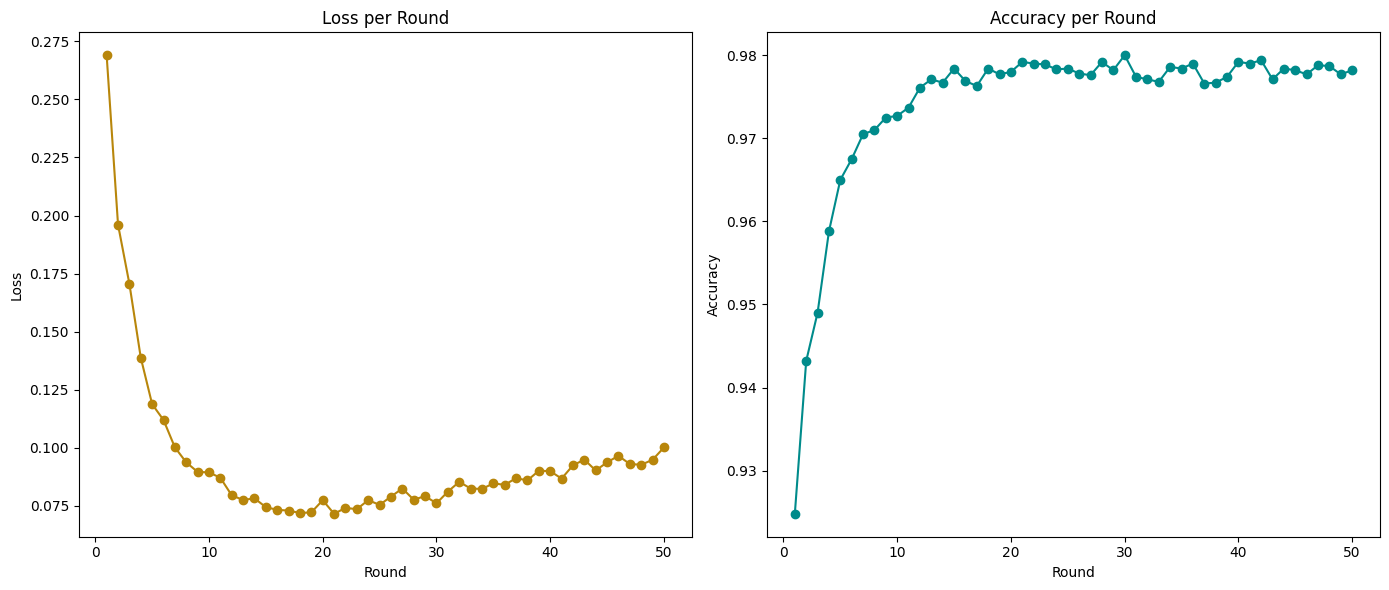

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Parameters for federated learning
num_clients = 5
num_rounds = 50
noise_multiplier = 0.05  # Adjusted noise multiplier
sensitivity = 1.0

# Split the data among clients
client_data = np.array_split(x_train, num_clients)
client_labels = np.array_split(y_train, num_clients)

# Define the global model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to add differential privacy noise
def add_noise(weights, noise_multiplier, sensitivity=1.0):
    noise = np.random.normal(scale=noise_multiplier * sensitivity, size=weights.shape)
    return weights + noise

# Initialize global model
global_model = create_model()
global_weights = global_model.get_weights()

# Variables to store privacy metrics and losses
total_noise_added = 0
privacy_budget = 0
losses = []
accuracies = []

# Federated learning process
for round_num in range(num_rounds):
    local_weights = []
    round_noise = 0

    for client_idx in range(num_clients):
        # Train local model
        local_model = create_model()
        local_model.set_weights(global_weights)
        local_model.fit(client_data[client_idx], client_labels[client_idx], epochs=1, verbose=0)

        # Add noise to the model weights for differential privacy
        noisy_weights = []
        for weight in local_model.get_weights():
            noisy_weight = add_noise(weight, noise_multiplier, sensitivity)
            noisy_weights.append(noisy_weight)

        # Accumulate noise for privacy budget calculation
        round_noise += np.sum([np.abs(n - w).sum() for n, w in zip(noisy_weights, local_model.get_weights())])

        # Store local model weights
        local_weights.append(noisy_weights)

    # Aggregate local weights to update the global model
    aggregated_weights = []
    for layer_weights in zip(*local_weights):
        # Compute the mean for each layer
        aggregated_layer_weights = np.mean(np.array(layer_weights), axis=0)
        aggregated_weights.append(aggregated_layer_weights)

    global_weights = aggregated_weights

    # Set aggregated weights to the global model
    global_model.set_weights(global_weights)

    # Estimate privacy budget (ε)
    privacy_budget += round_noise / (num_clients * x_train.shape[0])

    # Evaluate the global model at this round
    y_pred_proba = global_model.predict(x_test)
    loss, accuracy = global_model.evaluate(x_test, y_test, verbose=0)

    # Record metrics
    losses.append(loss)
    accuracies.append(accuracy)

    # Print metrics for this round
    print(f"Round {round_num + 1}")
    print(f"Loss: {loss}")
    print(f"Accuracy: {accuracy}")

# Final metrics
y_pred_binary = np.argmax(y_pred_proba, axis=1)
y_test_binary = np.argmax(y_test, axis=1)

precision = precision_score(y_test_binary, y_pred_binary, average='weighted')
recall = recall_score(y_test_binary, y_pred_binary, average='weighted')
f1 = f1_score(y_test_binary, y_pred_binary, average='weighted')
roc_auc = roc_auc_score(y_test_binary, y_pred_proba, average='weighted', multi_class='ovr')

print("\n")
print("======================================\n")
print(f"Final Loss: {losses[-1]}")
print(f"Final Accuracy: {accuracies[-1]}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")
print(f"Estimated Privacy Budget (ε): {privacy_budget}")
print("\n")
print("======================================\n")

# Plot the results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_rounds + 1), losses, marker='o', color='#b8860b')
plt.title('Loss per Round')
plt.xlabel('Round')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_rounds + 1), accuracies, marker='o', color='darkcyan')
plt.title('Accuracy per Round')
plt.xlabel('Round')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()



## ***<span style="color:blue">Approach B:</span>***

Round 1
Loss: 0.404247522354126
Accuracy: 0.9197999835014343
Round 2
Loss: 0.30021587014198303
Accuracy: 0.9430000185966492
Round 3
Loss: 0.24544893205165863
Accuracy: 0.954800009727478
Round 4
Loss: 0.2147492915391922
Accuracy: 0.960099995136261
Round 5
Loss: 0.19819439947605133
Accuracy: 0.9625999927520752
Round 6
Loss: 0.19344648718833923
Accuracy: 0.964900016784668
Round 7
Loss: 0.18825042247772217
Accuracy: 0.965499997138977
Round 8
Loss: 0.18766875565052032
Accuracy: 0.9670000076293945
Round 9
Loss: 0.1780080646276474
Accuracy: 0.9699000120162964
Round 10
Loss: 0.17442332208156586
Accuracy: 0.9706000089645386
Round 11
Loss: 0.17394104599952698
Accuracy: 0.9699000120162964
Round 12
Loss: 0.17513754963874817
Accuracy: 0.9686999917030334
Round 13
Loss: 0.17706835269927979
Accuracy: 0.9725000262260437
Round 14
Loss: 0.18677261471748352
Accuracy: 0.9703999757766724
Round 15
Loss: 0.1917668730020523
Accuracy: 0.97079998254776
Round 16
Loss: 0.1853114664554596
Accuracy: 0.97140002250671

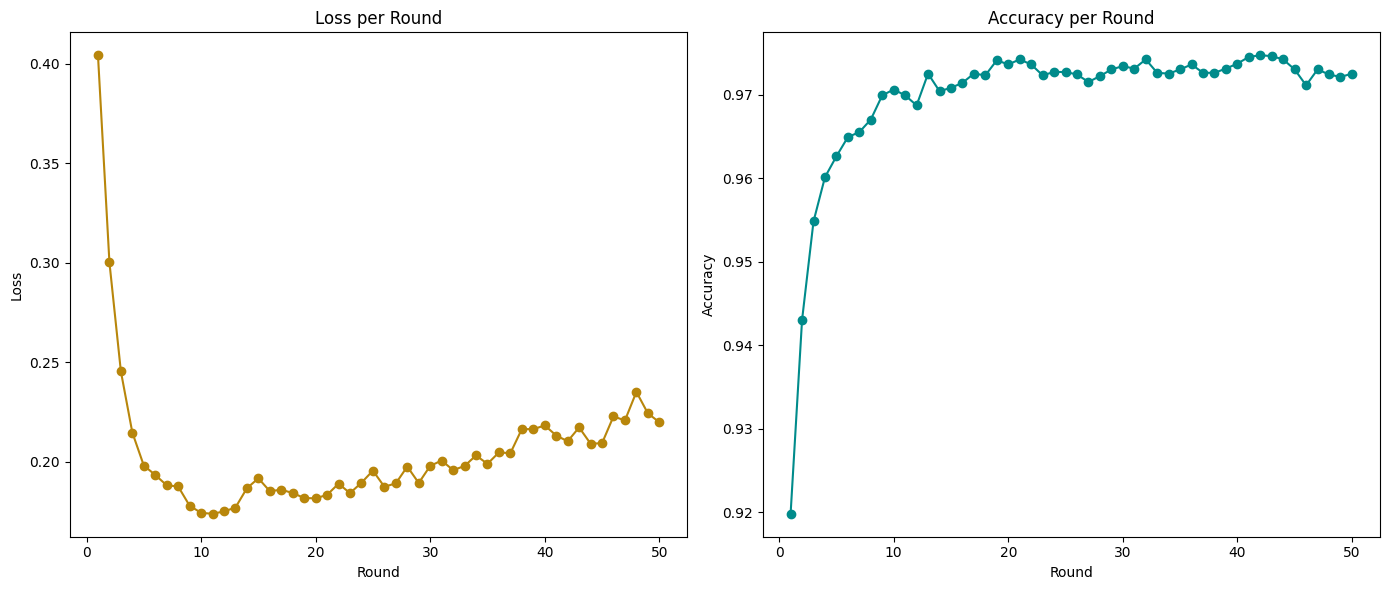

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from opacus import PrivacyEngine
import numpy as np
import matplotlib.pyplot as plt

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.fc1 = nn.Linear(32*26*26, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = x.view(-1, 32*26*26)
        x = self.fc1(x)
        return torch.log_softmax(x, dim=1)

class FederatedMNISTDataset(Dataset):
    def __init__(self, data, targets):
        self.data = torch.tensor(data, dtype=torch.float32).unsqueeze(1)  # Add channel dimension
        self.targets = torch.tensor(targets, dtype=torch.float32)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]

transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST('.', train=True, download=True, transform=transform)
test_data = datasets.MNIST('.', train=False, download=True, transform=transform)

x_train = train_data.data.numpy()
y_train = train_data.targets.numpy()
x_test = test_data.data.numpy()
y_test = test_data.targets.numpy()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

num_clients = 5
num_rounds = 50
noise_multiplier = 0.1  # Increased noise multiplier for enhanced privacy
sensitivity = 1.0

client_data = np.array_split(x_train, num_clients)
client_labels = np.array_split(y_train, num_clients)

client_loaders = [
    DataLoader(FederatedMNISTDataset(data, labels), batch_size=64, shuffle=True)
    for data, labels in zip(client_data, client_labels)
]

global_model = SimpleCNN()
optimizer = optim.Adam(global_model.parameters(), lr=0.01)  # Use Adam optimizer for better performance

privacy_engine = PrivacyEngine()
global_model, optimizer, _ = privacy_engine.make_private(
    module=global_model,
    optimizer=optimizer,
    data_loader=client_loaders[0],
    max_grad_norm=1.0,
    noise_multiplier=noise_multiplier,
)

def remove_prefix(state_dict):
    return {k[len('_module.'):]: v for k, v in state_dict.items()}

total_noise_added = 0
privacy_budget = 0
losses = []
accuracies = []

for round_num in range(num_rounds):
    local_weights = []
    round_noise = 0

    for client_loader in client_loaders:
        local_model = SimpleCNN()
        local_model.load_state_dict(remove_prefix(global_model.state_dict()))
        local_optimizer = optim.Adam(local_model.parameters(), lr=0.01)  # Use Adam optimizer for local models

        # Setup PrivacyEngine for local model
        local_privacy_engine = PrivacyEngine()
        local_model, local_optimizer, _ = local_privacy_engine.make_private(
            module=local_model,
            optimizer=local_optimizer,
            data_loader=client_loader,
            max_grad_norm=1.0,
            noise_multiplier=noise_multiplier,
        )

        # Training local model with DP
        local_model.train()
        for data, target in client_loader:
            local_optimizer.zero_grad()
            output = local_model(data)
            loss = nn.NLLLoss()(output, torch.max(target, 1)[1])
            loss.backward()
            local_optimizer.step()

        # Store local model weights
        local_weights.append(local_model.state_dict())

    # Aggregate local weights
    aggregated_weights = {}
    for key in local_weights[0]:
        aggregated_weights[key] = torch.mean(torch.stack([w[key] for w in local_weights]), dim=0)

    # Update global model with aggregated weights
    global_model.load_state_dict(aggregated_weights)

    # Privacy budget estimation
    privacy_budget += noise_multiplier * sensitivity * (num_clients / len(x_train))

    # Evaluate the global model
    global_model.eval()
    test_data = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)
    test_labels = torch.tensor(y_test, dtype=torch.float32)
    with torch.no_grad():
        output = global_model(test_data)
        loss = nn.NLLLoss()(output, torch.max(test_labels, 1)[1])
        accuracy = (torch.argmax(output, 1) == torch.argmax(test_labels, 1)).float().mean().item()

    # Record metrics
    losses.append(loss.item())
    accuracies.append(accuracy)

    # Print metrics for this round
    print(f"Round {round_num + 1}")
    print(f"Loss: {loss.item()}")
    print(f"Accuracy: {accuracy}")

print("\n")
print("======================================\n")
print(f"Final Loss: {losses[-1]}")
print(f"Final Accuracy: {accuracies[-1]}")
print(f"Estimated Privacy Budget (ε): {privacy_budget}")
print("\n")
print("======================================\n")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_rounds + 1), losses, marker='o', color='#b8860b')
plt.title('Loss per Round')
plt.xlabel('Round')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_rounds + 1), accuracies, marker='o', color='darkcyan')
plt.title('Accuracy per Round')
plt.xlabel('Round')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()
